In [ ]:
import sys
import numpy as np
import sounddevice as sd


sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile


# Path to the .wav files
audio_A1 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound1.wav"
audio_SH = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound2.wav"
audio_MM = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound3.wav"
audio_A2 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound4.wav"
audio_TAP = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound5.wav"

audios = [audio_A1, audio_SH, audio_MM, audio_A2, audio_TAP]


# Exercise 1

In [ ]:

for audio in audios:
    freq, audio_data = wavfile.read(audio)
    time_vector = np.arange(len(audio_data)) / freq
    audio_data = audio_data / 2 ** 15
    # Plot the audio data
    continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )
    discrete_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        markersize=2,
        linewidth=0.5,
    )
    # Play the audio
    sd.play(audio_data, freq)

    # Wait for the audio to finish playing
    sd.wait()

# Exercise 2

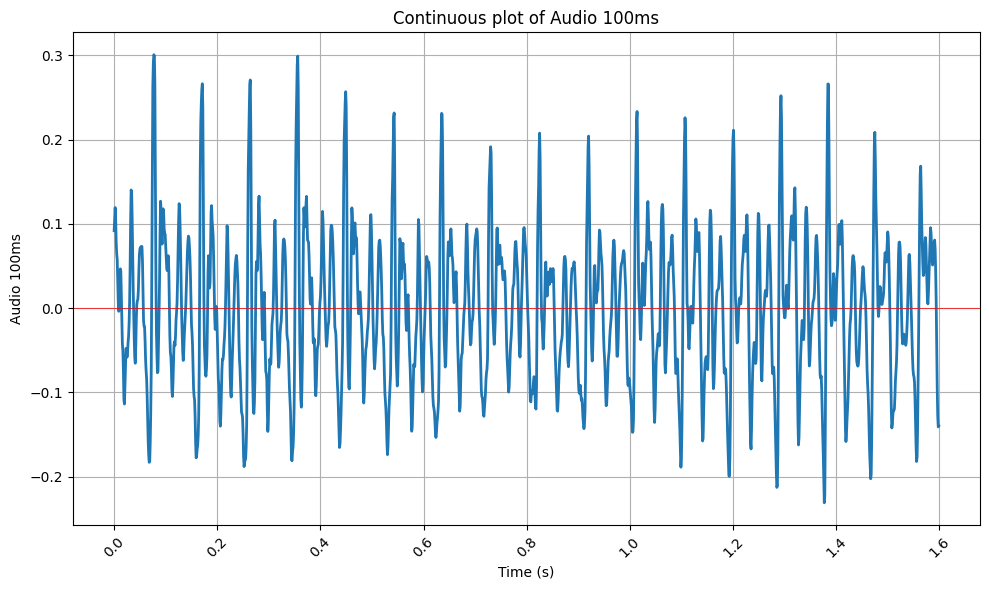

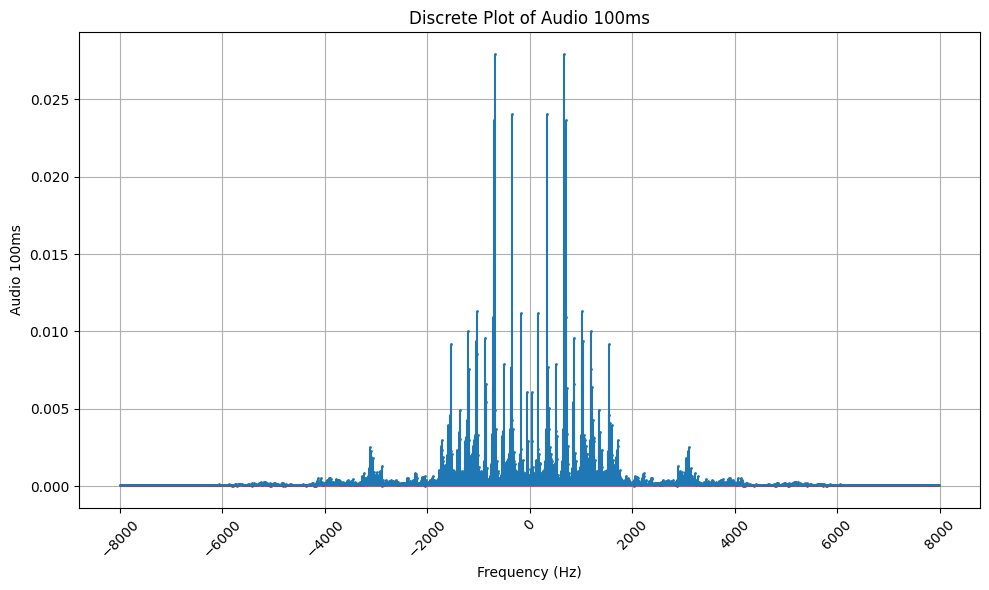

Fundamental Frequency: 680.0 Hz
Fundamental Period: 0.001 s
Power: 0.001 W
Power in dB: -28.643 dB
Energy: 45.924 J
Energy in dB: 16.62 dB


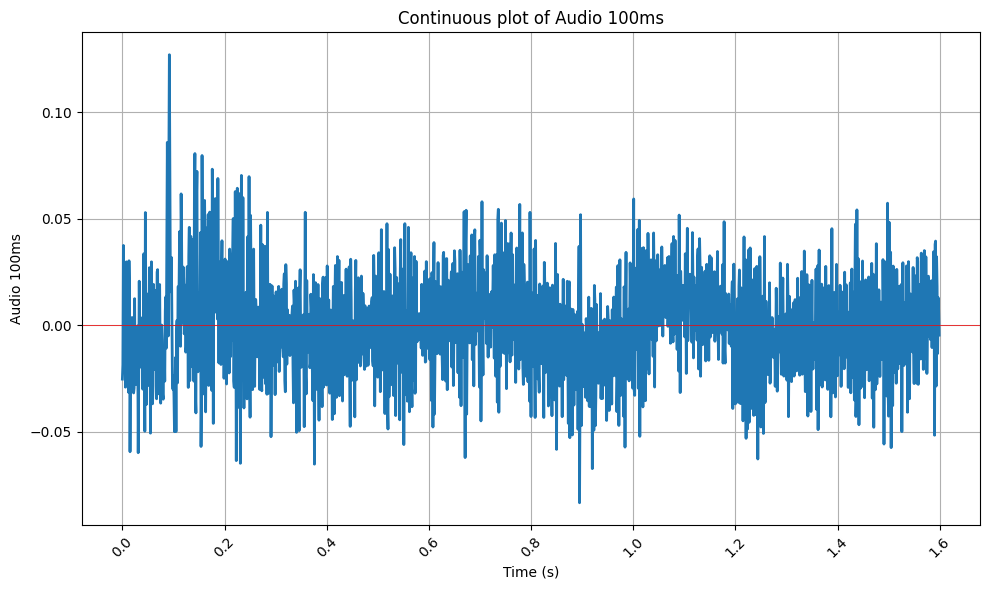

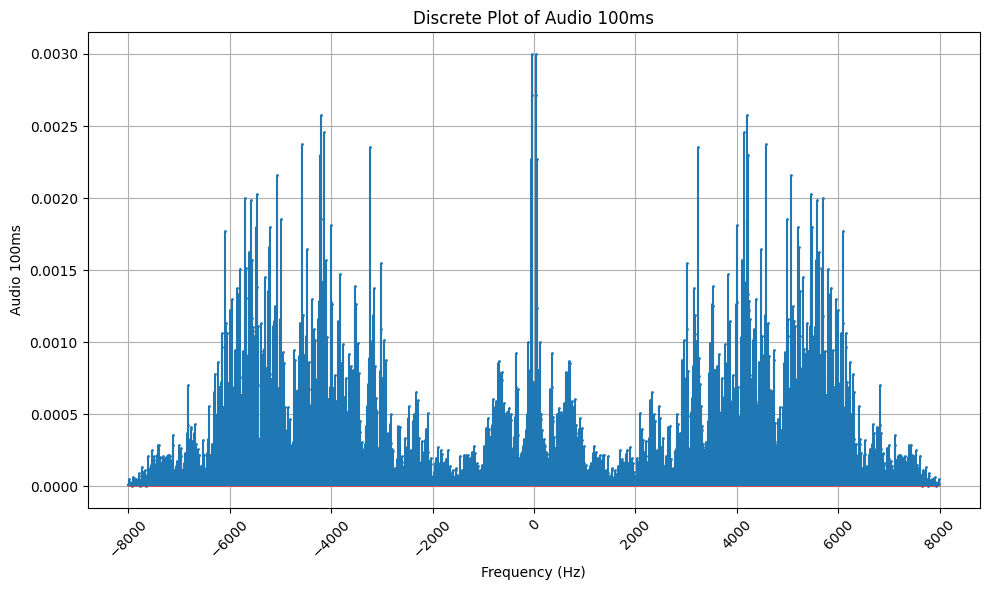

Fundamental Frequency: 30.0 Hz
Fundamental Period: 0.033 s
Power: 0.0 W
Power in dB: -36.364 dB
Energy: 12.937 J
Energy in dB: 11.118 dB


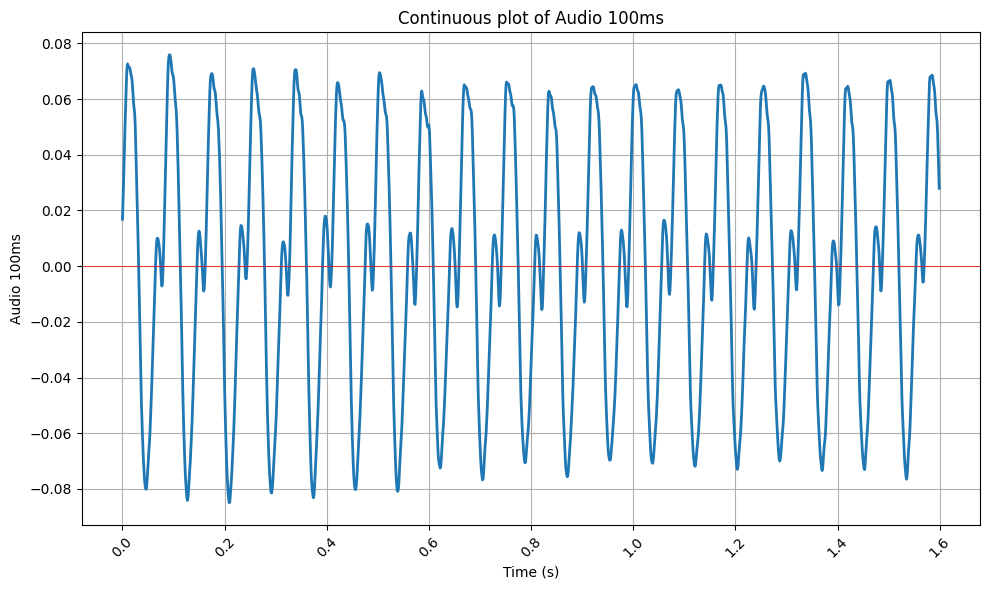

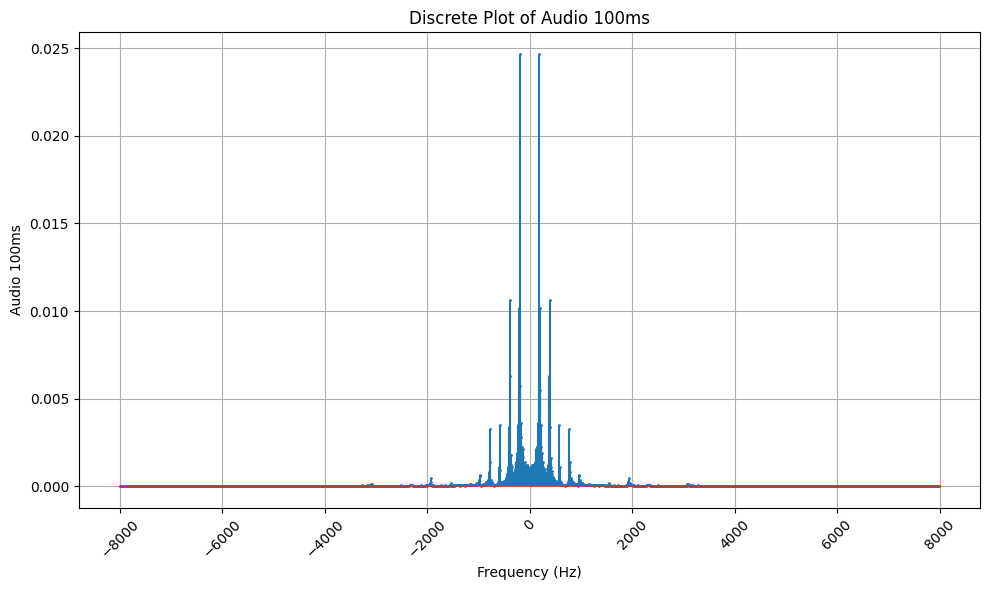

Fundamental Frequency: 190.0 Hz
Fundamental Period: 0.005 s
Power: 0.002 W
Power in dB: -27.538 dB
Energy: 70.518 J
Energy in dB: 18.483 dB


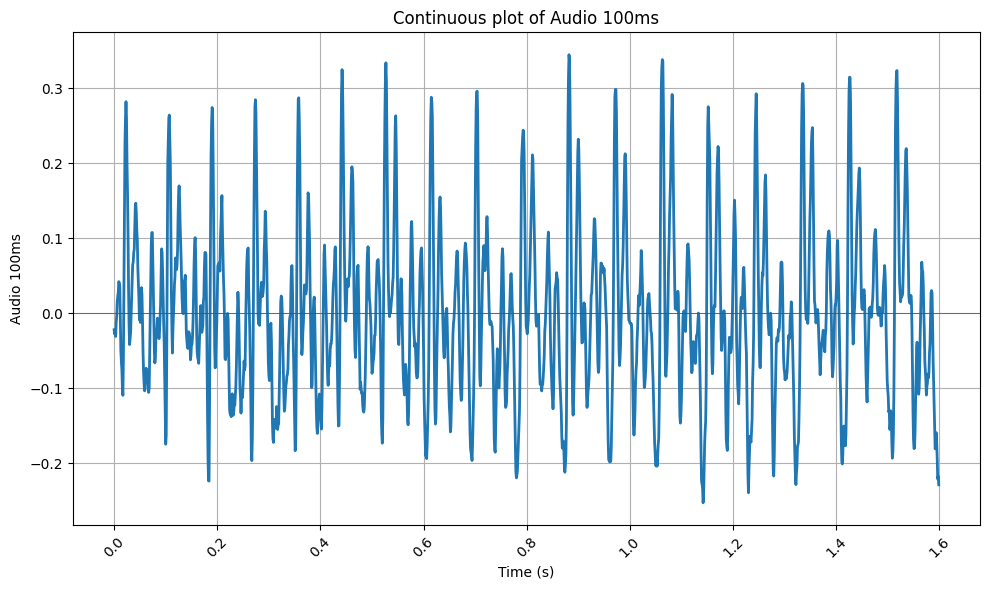

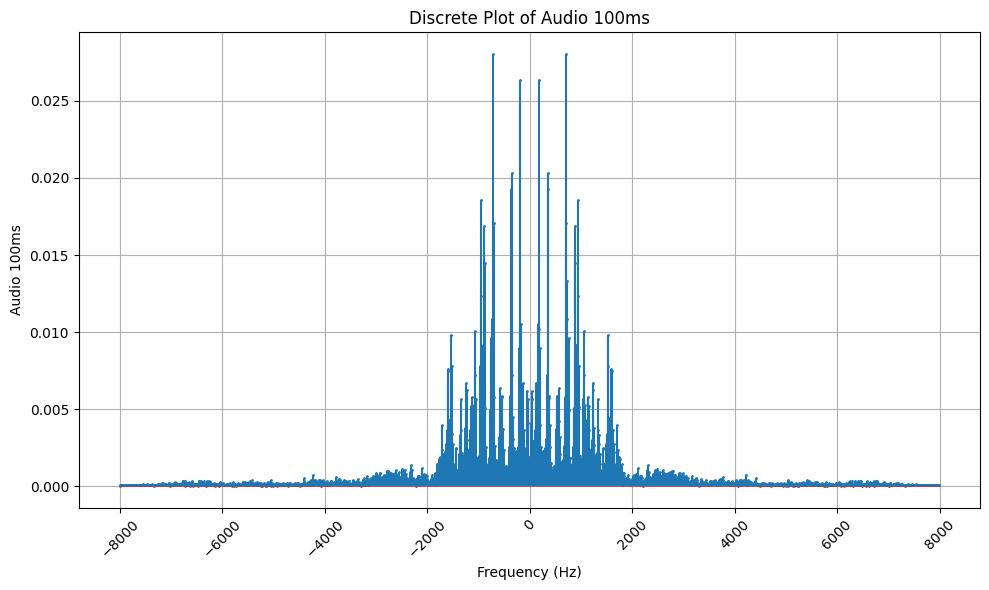

Fundamental Frequency: 710.0 Hz
Fundamental Period: 0.001 s
Power: 0.004 W
Power in dB: -24.415 dB
Energy: 174.275 J
Energy in dB: 22.412 dB


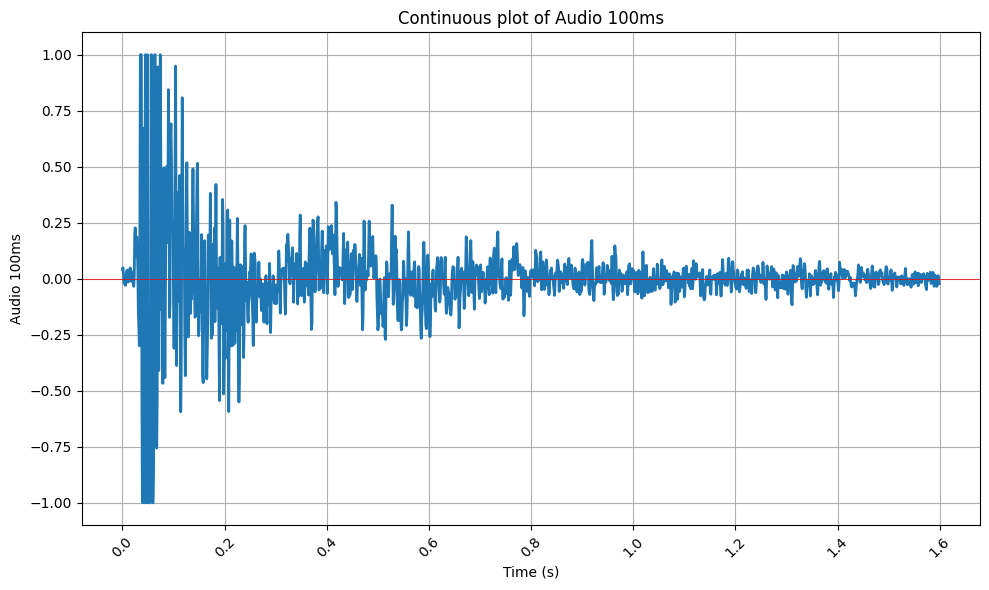

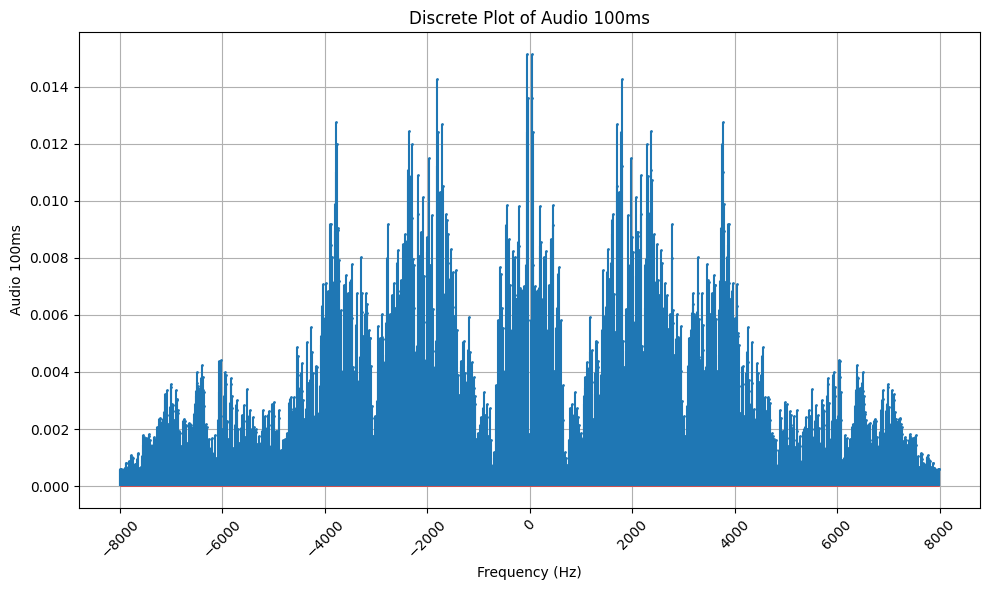

Fundamental Frequency: 50.0 Hz
Fundamental Period: 0.02 s
Power: 0.002 W
Power in dB: -26.072 dB
Energy: 51.388 J
Energy in dB: 17.109 dB


In [49]:
muestras_audio= (15000, 14000, 1500, 18000,12300)
for i in range(len(audios)):
    freq, y = wavfile.read(audios[i])
    y = y / 2 ** 15
    time_scale= int(freq * 0.1)
    time_vector= np.arange(time_scale) / 1000 # time in ms
    audio_100ms = y[muestras_audio[i]:muestras_audio[i]+time_scale]
    continuous_time_plot(time_vector,audio_100ms, variable_name="Audio 100ms", xlabel="Time (s)")

    # Make a fast discrete fourier frecuency plot
    N = len(audio_100ms)
    Y = np.fft.fft(audio_100ms)
    Y = np.abs(Y) / N
    f = np.fft.fftfreq(N, 1 / freq)
    
    discrete_time_plot(f, Y, variable_name="Audio 100ms", xlabel="Frequency (Hz)")

    # Now we will print the maximum frecuency of each plot for getting the fundamental frecuency
    max_frec = np.max(Y)
    index = np.where(Y == max_frec)
    print(f"Fundamental Frequency: {abs(f[index][0])} Hz")
    print(f"Fundamental Period: {round(1/abs(f[index][0]),3)} s")


    # Now we will calculate the power for each signal
    power = (y ** 2).mean()
    print(f"Power: {round(power,3)} W")
    print(f"Power in dB: {round(10 * np.log10(power),3)} dB")

    # Now we will calculate the energy for each signal
    energy = np.sum(y ** 2)
    print(f"Energy: {round(energy,3)} J")
    print(f"Energy in dB: {round(10 * np.log10(energy),3)} dB")


